In [124]:
#Import packages
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import CategoricalDtype

In [125]:
# Read CSV file
df = pd.read_csv('/datc/parcel/notebooks/data/postnl/20200904_sample.csv', index_col=0, parse_dates=[1])

In [126]:
# Convert dates to weekdays
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_name = CategoricalDtype(categories=days, ordered=True)
df['weekdag'] = df['procesdag'].dt.day_name()
df['weekdag'] = df['weekdag'].astype(day_name)

"""For some reason, on Jupyterhub, i can not use the locale attribute to convert the dates to weekdays in dutch. It gives a "UnsupportedLocale exception". Eventhough, it does work on my local machine"""

'For some reason, on Jupyterhub, i can not use the locale attribute to convert the dates to weekdays in dutch. It gives a "UnsupportedLocale exception". Eventhough, it does work on my local machine'

In [127]:
# Manipulate data
new_df = df.groupby([df['cust_id'], df['weekdag']]).agg(
    gem_aantal_pakketten = ('aantal_pakketten', 'mean'),
    gem_aantal_pakketten_volgende_dag = ('aantal_pakketten_volgende_dag', 'mean'),
    med_aantal_pakketten = ('aantal_pakketten', 'median'),
    med_aantal_pakketten_volgende_dag = ('aantal_pakketten_volgende_dag', 'median')
).reset_index()

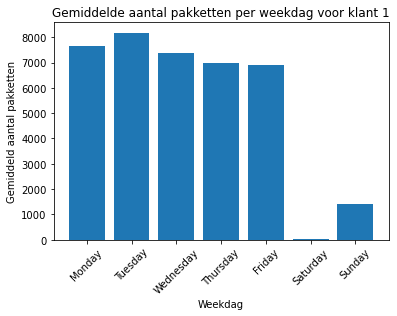

   cust_id    weekdag  gem_aantal_pakketten  \
0  klant_1     Monday           7647.581197   
1  klant_1    Tuesday           8175.918803   
2  klant_1  Wednesday           7378.243590   
3  klant_1   Thursday           6981.487179   
4  klant_1     Friday           6884.200000   
5  klant_1   Saturday             17.655319   
6  klant_1     Sunday           1415.021368   

   gem_aantal_pakketten_volgende_dag  med_aantal_pakketten  \
0                        8175.918803                7875.0   
1                        7378.243590                7912.0   
2                        6981.487179                7133.5   
3                        6877.632479                6734.0   
4                          17.655319                6629.0   
5                        1420.800000                   0.0   
6                        7647.581197                1010.0   

   med_aantal_pakketten_volgende_dag  
0                             7912.0  
1                             7133.5  
2        

In [128]:
# Filter for "klant_1"
df_klant1 = new_df.where(new_df['cust_id'] == 'klant_1').dropna()

# Plot the graph
fig, ax = plt.subplots()
ax.bar(df_klant1['weekdag'], df_klant1['gem_aantal_pakketten'])
ax.set(
    xlabel = 'Weekdag',
    ylabel = 'Gemiddeld aantal pakketten',
    title = 'Gemiddelde aantal pakketten per weekdag voor klant 1')
plt.xticks(rotation=45)
plt.show()

print(df_klant1)

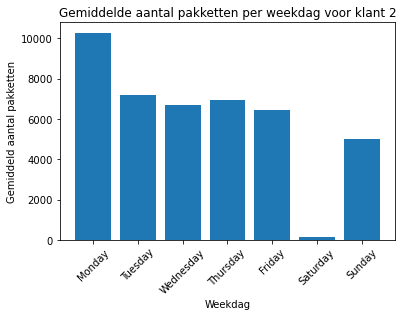

    cust_id    weekdag  gem_aantal_pakketten  \
7   klant_2     Monday          10278.431624   
8   klant_2    Tuesday           7197.803419   
9   klant_2  Wednesday           6698.679487   
10  klant_2   Thursday           6953.995726   
11  klant_2     Friday           6429.982979   
12  klant_2   Saturday            128.638298   
13  klant_2     Sunday           5015.059829   

    gem_aantal_pakketten_volgende_dag  med_aantal_pakketten  \
7                         7197.803419                8501.0   
8                         6698.679487                5562.0   
9                         6953.995726                4550.0   
10                        6438.029915                4323.5   
11                         128.638298                4448.0   
12                        5099.748936                   0.0   
13                       10278.431624                1800.5   

    med_aantal_pakketten_volgende_dag  
7                              5562.0  
8                             

In [129]:
# Filter for "klant_2"
df_klant2 = new_df.where(new_df['cust_id'] == 'klant_2').dropna()

# Plot the graph
fig, ax = plt.subplots()
ax.bar(df_klant2['weekdag'], df_klant2['gem_aantal_pakketten'])
ax.set(
    xlabel = 'Weekdag',
    ylabel = 'Gemiddeld aantal pakketten',
    title = 'Gemiddelde aantal pakketten per weekdag voor klant 2')
plt.xticks(rotation=45)
plt.show()

print(df_klant2)

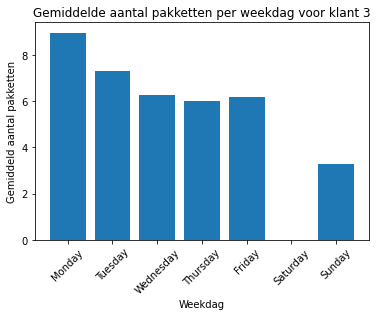

    cust_id    weekdag  gem_aantal_pakketten  \
14  klant_3     Monday              8.965812   
15  klant_3    Tuesday              7.290598   
16  klant_3  Wednesday              6.273504   
17  klant_3   Thursday              5.991453   
18  klant_3     Friday              6.178723   
19  klant_3   Saturday              0.000000   
20  klant_3     Sunday              3.264957   

    gem_aantal_pakketten_volgende_dag  med_aantal_pakketten  \
14                           7.290598                   7.0   
15                           6.273504                   5.0   
16                           5.991453                   4.0   
17                           6.149573                   4.0   
18                           0.000000                   4.0   
19                           3.336170                   0.0   
20                           8.965812                   0.0   

    med_aantal_pakketten_volgende_dag  
14                                5.0  
15                            

In [130]:
# Filter for "klant_3"
df_klant3 = new_df.where(new_df['cust_id'] == 'klant_3').dropna()

# Plot the graph
fig, ax = plt.subplots()
ax.bar(df_klant3['weekdag'], df_klant3['gem_aantal_pakketten'])
ax.set(
    xlabel = 'Weekdag',
    ylabel = 'Gemiddeld aantal pakketten',
    title = 'Gemiddelde aantal pakketten per weekdag voor klant 3')
plt.xticks(rotation=45)
plt.show()

print(df_klant3)

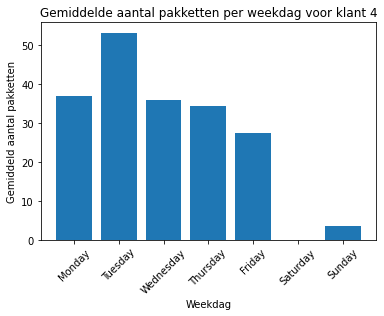

    cust_id    weekdag  gem_aantal_pakketten  \
21  klant_4     Monday             36.897436   
22  klant_4    Tuesday             53.106838   
23  klant_4  Wednesday             35.790598   
24  klant_4   Thursday             34.311966   
25  klant_4     Friday             27.353191   
26  klant_4   Saturday              0.059574   
27  klant_4     Sunday              3.547009   

    gem_aantal_pakketten_volgende_dag  med_aantal_pakketten  \
21                          53.106838                   0.0   
22                          35.790598                   0.0   
23                          34.311966                   0.0   
24                          27.470085                   0.0   
25                           0.059574                   0.0   
26                           3.536170                   0.0   
27                          36.897436                   0.0   

    med_aantal_pakketten_volgende_dag  
21                                0.0  
22                            

In [131]:
# Filter for "klant_4"
df_klant4 = new_df.where(new_df['cust_id'] == 'klant_4').dropna()

# Plot the graph
fig, ax = plt.subplots()
ax.bar(df_klant4['weekdag'], df_klant4['gem_aantal_pakketten'])
ax.set(
    xlabel = 'Weekdag',
    ylabel = 'Gemiddeld aantal pakketten',
    title = 'Gemiddelde aantal pakketten per weekdag voor klant 4')
plt.xticks(rotation=45)
plt.show()

print(df_klant4)

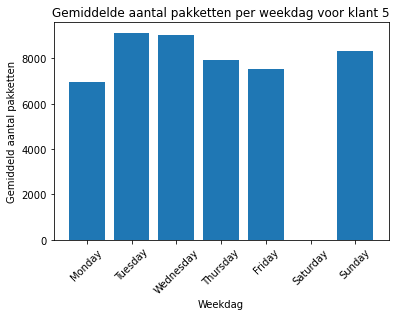

    cust_id    weekdag  gem_aantal_pakketten  \
28  klant_5     Monday           6936.730769   
29  klant_5    Tuesday           9130.465812   
30  klant_5  Wednesday           9019.841880   
31  klant_5   Thursday           7927.940171   
32  klant_5     Friday           7520.812766   
33  klant_5   Saturday              7.761702   
34  klant_5     Sunday           8308.029915   

    gem_aantal_pakketten_volgende_dag  med_aantal_pakketten  \
28                        9130.465812                2556.5   
29                        9019.841880                4033.0   
30                        7927.940171                3469.5   
31                        7552.952991                3117.5   
32                           7.761702                3129.0   
33                        8273.170213                   0.0   
34                        6936.730769                1302.5   

    med_aantal_pakketten_volgende_dag  
28                             4033.0  
29                            

In [132]:
# Filter for "klant_5"
df_klant5 = new_df.where(new_df['cust_id'] == 'klant_5').dropna()

# Plot the graph
fig, ax = plt.subplots()
ax.bar(df_klant5['weekdag'], df_klant5['gem_aantal_pakketten'])
ax.set(
    xlabel = 'Weekdag',
    ylabel = 'Gemiddeld aantal pakketten',
    title = 'Gemiddelde aantal pakketten per weekdag voor klant 5')
plt.xticks(rotation=45)
plt.show()

print(df_klant5)

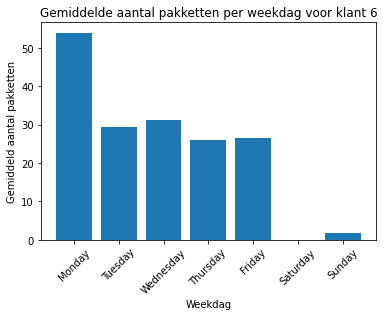

    cust_id    weekdag  gem_aantal_pakketten  \
35  klant_6     Monday             53.905983   
36  klant_6    Tuesday             29.367521   
37  klant_6  Wednesday             31.303419   
38  klant_6   Thursday             25.923077   
39  klant_6     Friday             26.408511   
40  klant_6   Saturday              0.004255   
41  klant_6     Sunday              1.888889   

    gem_aantal_pakketten_volgende_dag  med_aantal_pakketten  \
35                          29.367521                   0.5   
36                          31.303419                   6.5   
37                          25.923077                   9.0   
38                          26.521368                   6.0   
39                           0.004255                   9.0   
40                           2.008511                   0.0   
41                          53.905983                   0.0   

    med_aantal_pakketten_volgende_dag  
35                                6.5  
36                            

In [123]:
# Filter for "klant_6"
df_klant6 = new_df.where(new_df['cust_id'] == 'klant_6').dropna()

# Plot the graph
fig, ax = plt.subplots()
ax.bar(df_klant6['weekdag'], df_klant6['gem_aantal_pakketten'])
ax.set(
    xlabel = 'Weekdag',
    ylabel = 'Gemiddeld aantal pakketten',
    title = 'Gemiddelde aantal pakketten per weekdag voor klant 6')
plt.xticks(rotation=45)
plt.show()

print(df_klant6)